In [4]:
import numpy as np
import time
import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display,IFrame,HTML,Image
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url='https://www.janestreet.com/puzzles/knight-moves-6-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
y =[text for text in soup.body.stripped_strings]
#display([(i,j) for i,j in enumerate(y)])
display(Markdown("### "+y[13]+"\n"+" ".join(y[15:86])))
display(Image(url='https://www.janestreet.com/puzzles/october-2024.png',width=300))

### Knight Moves 6
Pick distinct positive integers A , B , and C , and place them in the grid above. Your goal is to create two corner-to-corner trips — one from a1 to f6 , and the other from a6 to f1 — both of which score exactly 2024 points . A “trip” consists of knight’s moves. Squares may not be revisited within a trip. The “score” for a trip is calculated as follows: Start with A points. Every time you make a move: if your move is between two different integers, multiply your score by the value you are moving to; otherwise, increment your score by the value you are moving to. Can you find positive integers A , B , and C , as well as a pair of trips, that satisfy the criteria above? How low can you get A + B + C ? Please format your entry by concatenating your values for A , B , and C , followed by your a1 -to- f6 tour, followed by your a6 -to- f1 tour. For example, “1,2,253,a1,b3,c5,d3,f4,d5,f6,a6,c5,a4,b2,c4,d2,f1” would be a properly formatted entry. To qualify for the leaderboard your value for A + B + C must be less than 50 .

In [3]:
board = np.array([
       ['A', 'B', 'B', 'C', 'C', 'C'],
       ['A', 'B', 'B', 'C', 'C', 'C'],
       ['A', 'A', 'B', 'B', 'C', 'C'],
       ['A', 'A', 'B', 'B', 'C', 'C'],
       ['A', 'A', 'A', 'B', 'B', 'C'],
       ['A', 'A', 'A', 'B', 'B', 'C']
])

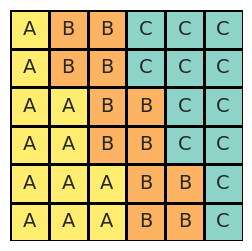

In [5]:
vals = {'A':1,'B':2,'C':3}
conv = np.vectorize(lambda x: vals[x])

fig,ax = plt.subplots(1,1,figsize=(3,3))
ax =sns.heatmap(conv(board),annot=board,cbar=False,cmap="Set3_r",fmt="",linewidths=2,annot_kws={"size":14},linecolor='k')
ax.axis("off")
plt.show()

In [9]:
def moves(i,j,N):
    moves=[(2, 1), (1, 2), (-1, 2), (-2, 1), (-2, -1), (-1, -2), (1, -2), (2, -1)]
    return [(i+x,j+y) for x,y in moves if i+x >=0 and i+x<N and j+y>=0 and j+y<N ]

def scorer(score,prev,current,values_dict):
    if prev == current:
        return score + values_dict[current]
    else:
        return score * values_dict[current]

def test(soln,board,vals):
    cols = "abcdefgh"
    for e,i in enumerate(soln):
        if e == 0:
            score = vals[board[i]]
            print(e+1,cols[i[1]]+str(6-i[0]),board[i],vals[board[i]],score)
        else:
            if board[i] == board[soln[e-1]]:
                score += vals[board[i]]
            else:
                score *= vals[board[i]]
            print(e+1,cols[i[1]]+str(6-i[0]),board[i],vals[board[i]],score)


In [43]:
def solver(vals = {'A':1,'B':3,'C':2},max_path_length = 15):
    start = time.time()
    N = 6
    
    paths = [[[(5,0)],'A',vals['A']]] # paths
    stopper = True
    
    while stopper and len(paths)>0:
        current_path,previous,score = paths.pop()
        (x,y) = current_path[-1]
        for a,b in moves(x,y,N):
            new_score = scorer(score,previous,board[a,b],vals)
            if new_score == 2024:
                if (a,b) == (0,5):
                    solutionA = current_path+[(0,5)]
                    stopper = False
            if new_score < 2024:
                if len(current_path) < max_path_length:
                    if (a,b) not in current_path:
                        paths.append([current_path+[(a,b)],board[a,b],new_score])
    if stopper:
        print("no solution")
        return
    paths = [[[(0,0)],'A',vals['A']]] # paths
    stopper = True

    
    while stopper and len(paths)>0:
        current_path,previous,score = paths.pop()
        (x,y) = current_path[-1]
        for a,b in moves(x,y,N):
            new_score = scorer(score,previous,board[a,b],vals)
            if new_score == 2024:
                if (a,b) == (5,5):
                    solutionB = current_path+[(5,5)]
                    stopper = False
            if new_score < 2024:
                if len(current_path) < max_path_length:
                    if (a,b) not in current_path:
                        paths.append([current_path+[(a,b)],board[a,b],new_score])
    if stopper:
        print("no solution")
        return
    else :   
        cols = "abcdefgh"
        print("took {:.2f} seconds".format(time.time()-start))
        print( "The solution is",','.join([str(vals['A'])]+[str(vals['B'])]+[str(vals['C'])]+[cols[y]+str(6-x) for (x,y) in solutionA]+[cols[y]+str(6-x) for (x,y) in solutionB]))
        solA_labels = [[ str(solutionA.index((x,y))+1) if (x,y) in solutionA  else "" for y in range(6)]  for x in range(6)]
        solB_labels = [[ str(solutionB.index((x,y))+1) if (x,y) in solutionB  else "" for y in range(6)]  for x in range(6)]
        fig,ax = plt.subplots(1,2,figsize=(4,2))
        axA =sns.heatmap(conv(board),annot=solA_labels,cbar=False,cmap="Set3_r",fmt="",linewidths=1,annot_kws={"size":12},linecolor='k',ax=ax[0])
        axA.axis("off")
        axB =sns.heatmap(conv(board),annot=solB_labels,cbar=False,cmap="Set3_r",fmt="",linewidths=1,annot_kws={"size":12},linecolor='k',ax=ax[1])
        axB.axis("off")
        plt.tight_layout()
        plt.show()
        
        solns = [solutionA,solutionB]
        for soln in solns:
            print("Path")
            test(soln,board,vals)
        return (solutionA,solutionB)
    

13 (1, 2, 3)
no solution
14 (1, 2, 3)
no solution
15 (1, 2, 3)
no solution
13 (1, 3, 2)
no solution
14 (1, 3, 2)
took 1.66 seconds
The solution is 1,3,2,a1,b3,a5,c6,b4,d3,e5,f3,e1,c2,e3,d1,c3,d5,f6,a6,c5,b3,d4,c2,e1,f3,d2,c4,b6,d5,c3,d1,e3,f1


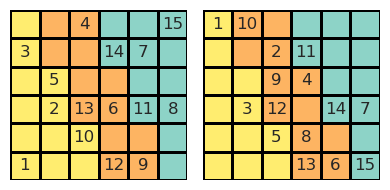

Path
1 a1 A 1 1
2 b3 A 1 2
3 a5 A 1 3
4 c6 B 3 9
5 b4 A 1 9
6 d3 B 3 27
7 e5 C 2 54
8 f3 C 2 56
9 e1 B 3 168
10 c2 A 1 168
11 e3 C 2 336
12 d1 B 3 1008
13 c3 B 3 1011
14 d5 C 2 2022
15 f6 C 2 2024
Path
1 a6 A 1 1
2 c5 B 3 3
3 b3 A 1 3
4 d4 B 3 9
5 c2 A 1 9
6 e1 B 3 27
7 f3 C 2 54
8 d2 B 3 162
9 c4 B 3 165
10 b6 B 3 168
11 d5 C 2 336
12 c3 B 3 1008
13 d1 B 3 1011
14 e3 C 2 2022
15 f1 C 2 2024
15 (1, 3, 2)
took 3.85 seconds
The solution is 1,3,2,a1,b3,a5,c6,b4,d3,e5,f3,e1,c2,e3,d1,c3,d5,f6,a6,c5,b3,d4,c2,e1,f3,d2,c4,b6,d5,c3,d1,e3,f1


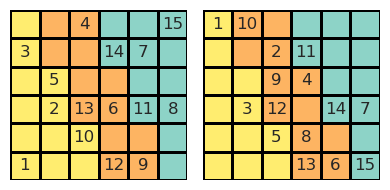

Path
1 a1 A 1 1
2 b3 A 1 2
3 a5 A 1 3
4 c6 B 3 9
5 b4 A 1 9
6 d3 B 3 27
7 e5 C 2 54
8 f3 C 2 56
9 e1 B 3 168
10 c2 A 1 168
11 e3 C 2 336
12 d1 B 3 1008
13 c3 B 3 1011
14 d5 C 2 2022
15 f6 C 2 2024
Path
1 a6 A 1 1
2 c5 B 3 3
3 b3 A 1 3
4 d4 B 3 9
5 c2 A 1 9
6 e1 B 3 27
7 f3 C 2 54
8 d2 B 3 162
9 c4 B 3 165
10 b6 B 3 168
11 d5 C 2 336
12 c3 B 3 1008
13 d1 B 3 1011
14 e3 C 2 2022
15 f1 C 2 2024
13 (2, 1, 3)
no solution
14 (2, 1, 3)
no solution
15 (2, 1, 3)
no solution
13 (2, 3, 1)
no solution
14 (2, 3, 1)
no solution
15 (2, 3, 1)
no solution
13 (3, 1, 2)
no solution
14 (3, 1, 2)
no solution
15 (3, 1, 2)
no solution
13 (3, 2, 1)
no solution
14 (3, 2, 1)
took 15.39 seconds
The solution is 3,2,1,a1,b3,a5,c4,b2,d1,c3,e2,c1,d3,e1,c2,e3,d5,f6,a6,c5,d3,c1,a2,c3,b5,a3,c4,b2,a4,b6,d5,e3,f1


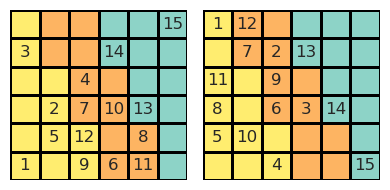

Path
1 a1 A 3 3
2 b3 A 3 6
3 a5 A 3 9
4 c4 B 2 18
5 b2 A 3 54
6 d1 B 2 108
7 c3 B 2 110
8 e2 B 2 112
9 c1 A 3 336
10 d3 B 2 672
11 e1 B 2 674
12 c2 A 3 2022
13 e3 C 1 2022
14 d5 C 1 2023
15 f6 C 1 2024
Path
1 a6 A 3 3
2 c5 B 2 6
3 d3 B 2 8
4 c1 A 3 24
5 a2 A 3 27
6 c3 B 2 54
7 b5 B 2 56
8 a3 A 3 168
9 c4 B 2 336
10 b2 A 3 1008
11 a4 A 3 1011
12 b6 B 2 2022
13 d5 C 1 2022
14 e3 C 1 2023
15 f1 C 1 2024
15 (3, 2, 1)
took 35.80 seconds
The solution is 3,2,1,a1,b3,a5,c4,b2,d1,c3,e2,c1,d3,e1,c2,e3,d5,f6,a6,c5,d3,c1,a2,c3,b5,a3,c4,b2,a4,b6,d5,e3,f1


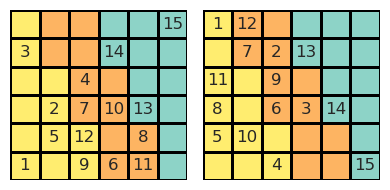

Path
1 a1 A 3 3
2 b3 A 3 6
3 a5 A 3 9
4 c4 B 2 18
5 b2 A 3 54
6 d1 B 2 108
7 c3 B 2 110
8 e2 B 2 112
9 c1 A 3 336
10 d3 B 2 672
11 e1 B 2 674
12 c2 A 3 2022
13 e3 C 1 2022
14 d5 C 1 2023
15 f6 C 1 2024
Path
1 a6 A 3 3
2 c5 B 2 6
3 d3 B 2 8
4 c1 A 3 24
5 a2 A 3 27
6 c3 B 2 54
7 b5 B 2 56
8 a3 A 3 168
9 c4 B 2 336
10 b2 A 3 1008
11 a4 A 3 1011
12 b6 B 2 2022
13 d5 C 1 2022
14 e3 C 1 2023
15 f1 C 1 2024


In [45]:

for  a,b,c in itertools.permutations([1,2,3]):
    for path in range(13,16,1):
        print(path,(a,b,c))
        solver(vals = {'A':a,'B':b,'C':c},max_path_length = path)


In [8]:
url='https://www.janestreet.com/puzzles/knight-moves-6-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
y =[text for text in soup.body.stripped_strings]
#display([(i,j) for i,j in enumerate(y)])
display(Markdown("### "+y[13]+"\n"+" ".join(y[16:99])))


### Knight Moves 6
For this month’s puzzle, solvers were tasked with picking three distinct positive integers that could support not one but two corner-to-corner knight’s journeys on a 6-by-6 board, each scoring exactly 2024 points. Nearly 40% of the entries we received managed to achieve a minimal sum of A + B + C = 6. Since C needed to be a divisor of 2024, this meant there were only 4 plausible permutations: (1, 3, 2) [the most popular set of values across all entries, appearing 214 times] (3, 2, 1) [the next most popular, appearing 86 times] (3, 1, 2) [third-most popular; 54 times] (2, 3, 1) [sixth-most popular 1 ; 31 times] Of the many entries we received, we would like to highlight a few: The longest journeys – for both the a1 -to- f6 leg and for a6 -to- f1 – came from Fred Vu , who chose (3, 1, 2) and supported it with the 32-move a1,c2,a3,b1,d2,f3,e1,d3,b2,a4,c5,a6,b4,a2,c1,b3,a5,c4,e5,c6,d4,b5,d6,f5,e3,d5,f4,e2,c3,d1,f2,e4,f6 and the theoretically-maximal 34-move a6,c5,d3,e1,f3,e5,c6,a5,b3,a1,c2,a3,b1,d2,c4,b6,a4,b2,d1,f2,e4,f6,d5,f4,e6,d4,e2,c1,a2,c3,b5,d6,f5,e3,f1 . The journey with the largest number of “multiply” moves (16) came from Justin Snopek , who also chose (3, 1, 2) and whose a6 -to- f1 path went a6,c5,a4,c3,a2,c1,e2,f4,d5,b6,c4,e5,d3,f2,d1,e3,f5,d4,f3,d2,f1 . Of the many entries we received that achieved the theoretical lower bound of 12 total moves (6 for each journey), the lowest value for A + B + C we received was 19 . The first entry we received to accomplish this came from Shyam Padmanabhan , who picked (4, 7, 8) and supported it with the journeys a1,b3,d4,c6,b4,d5,f6 and a6,b4,c6,d4,c2,e3,f1 . There were a handful of triples ( A , B , C ) that we received exactly once. The one with the lowest sum was (2, 1, 4), courtesy of Richard Turner ; its accompanying trips were a1,b3,d2,f1,e3,d5,f4,e2,c3,a2,b4,c2,e1,d3,f2,d1,b2,c4,d6,e4,f6 and a6,c5,e4,f2,d1,c3,b5,a3,c2,d4,c6,b4,d5,f4,e2,c1,b3,d2,f1 . Of the nine plausible values for C – i.e. divisors of 2024 no larger than 47 – the most popular among entries was 2, appearing in 335 entries. After that, the most popular were 4 (167 entries), 8 (153), 1 (126), 22 (99), 11 (84), 23 (17), 44 (4) and 46 (2). (46 was also the largest integer to occur in any entry, appearing in just those 2.) And finally, the least positive integer to appear in exactly zero entries was… 19. Congrats to everyone who sent us a valid entry! (4, 7, 8) and (1, 5, 2) were the most popular among those that did not achieve the minimal sum.